In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [5]:
data=pd.read_csv("C:\\Users\\sharo\\OneDrive\\Desktop\\3M Stock Price History.csv") 
print(data)

           Date   Price    Open    High     Low     Vol. Change %
0    07/16/2025  156.00  157.13  157.31  154.90  937.14K   -0.38%
1    07/15/2025  156.59  157.91  158.28  156.03    3.06M   -0.84%
2    07/14/2025  157.91  155.59  158.11  154.92    2.96M    1.33%
3    07/11/2025  155.84  156.05  156.55  154.82    2.40M   -0.94%
4    07/10/2025  157.32  156.11  159.47  155.96    4.04M    0.86%
..          ...     ...     ...     ...     ...      ...      ...
621  01/23/2023  102.52  100.84  103.59  100.67    3.41M    1.63%
622  01/20/2023  100.87   99.12  100.92   97.62    4.37M    1.87%
623  01/19/2023   99.02  102.00  102.24   98.92    4.98M   -3.52%
624  01/18/2023  102.63  106.06  106.34  102.22    4.26M   -3.04%
625  01/17/2023  105.85  108.49  108.61  105.67    3.51M   -2.25%

[626 rows x 7 columns]


In [6]:
column1="Price"
column2="Open"
column3="High" 
column4="Low" 
column5="Vol." 

In [8]:
missing1=data[column1].isnull().sum() 
missing2=data[column2].isnull().sum() 
missing3=data[column3].isnull().sum() 
missing4=data[column4].isnull().sum() 
missing5=data[column5].isnull().sum()

print("missing values in column1:",missing1)
print("missing values in column2:",missing2)
print("missing values in column3:",missing3)
print("missing values in column4:",missing4)
print("missing values in column5:",missing5) 

missing values in column1: 0
missing values in column2: 0
missing values in column3: 0
missing values in column4: 0
missing values in column5: 0


In [9]:
Q1=data[column1].quantile(0.25) 
Q3=data[column1].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("Quartile 1",Q1) 
print("Quatile 2",Q3) 

Quartile 1 85.83250000000001
Quatile 2 132.965


In [10]:
outliers = (data[column1] < lower_bound) | (data[column1] > upper_bound) 
print(outliers)
print("There is no Outliers")


0      False
1      False
2      False
3      False
4      False
       ...  
621    False
622    False
623    False
624    False
625    False
Name: Price, Length: 626, dtype: bool
There is no Outliers


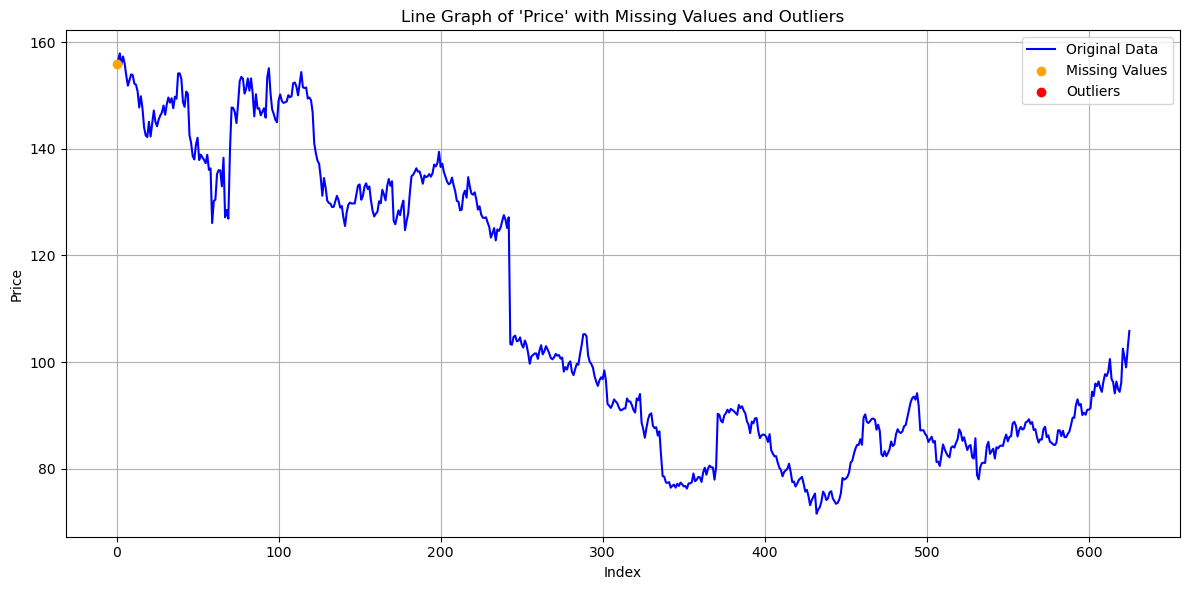

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data[column1], label='Original Data', color='blue')
plt.scatter(data.index[missing1], data[column1][missing1], color='orange', label='Missing Values', zorder=5)
plt.scatter(data.index[outliers], data[column1][outliers], color='red', label='Outliers', zorder=5)
plt.title(f"Line Graph of '{column1}' with Missing Values and Outliers") 
plt.xlabel("Index")
plt.ylabel(column1) 
plt.legend() 
plt.grid(True) 
plt.tight_layout()
plt.show()


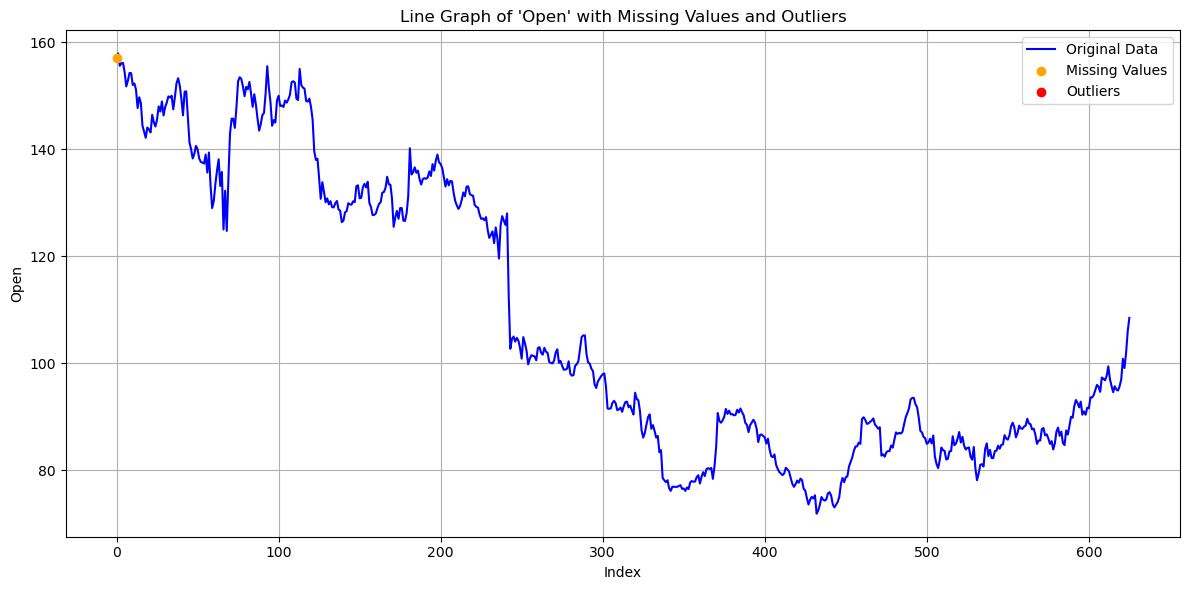

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data[column2], label='Original Data', color='blue')
plt.scatter(data.index[missing2], data[column2][missing2], color='orange', label='Missing Values', zorder=5)
plt.scatter(data.index[outliers], data[column2][outliers], color='red', label='Outliers', zorder=5)
plt.title(f"Line Graph of '{column2}' with Missing Values and Outliers")
plt.xlabel("Index")
plt.ylabel(column2)
plt.legend() 
plt.grid(True)
plt.tight_layout() 
plt.show()


In [14]:
data2=pd.read_csv("C:\\Users\\sharo\\OneDrive\\Desktop\\3M Stock Price History.csv",parse_dates=["Date"])
data2_1=data2.sort_values("Date")
print(data2_1)
data2_1.set_index('Date', inplace=True)
data2_1['Vol.'] = data2_1['Vol.'].str.replace('M', '').str.replace('K', '').astype(float) * 1000000 
data2_1 = data2_1.drop(columns=['Change %'])
monthly_data = data2_1.resample('ME').mean() 
monthly_data_clean = monthly_data.dropna() 

          Date   Price    Open    High     Low     Vol. Change %
625 2023-01-17  105.85  108.49  108.61  105.67    3.51M   -2.25%
624 2023-01-18  102.63  106.06  106.34  102.22    4.26M   -3.04%
623 2023-01-19   99.02  102.00  102.24   98.92    4.98M   -3.52%
622 2023-01-20  100.87   99.12  100.92   97.62    4.37M    1.87%
621 2023-01-23  102.52  100.84  103.59  100.67    3.41M    1.63%
..         ...     ...     ...     ...     ...      ...      ...
4   2025-07-10  157.32  156.11  159.47  155.96    4.04M    0.86%
3   2025-07-11  155.84  156.05  156.55  154.82    2.40M   -0.94%
2   2025-07-14  157.91  155.59  158.11  154.92    2.96M    1.33%
1   2025-07-15  156.59  157.91  158.28  156.03    3.06M   -0.84%
0   2025-07-16  156.00  157.13  157.31  154.90  937.14K   -0.38%

[626 rows x 7 columns]


In [15]:
additive_result = seasonal_decompose(monthly_data_clean["Price"], model='additive')
print(additive_result)

In [16]:
multiplicative_result = seasonal_decompose(monthly_data_clean["Price"], model='multiplicative')
print(multiplicative_result) 


Graph For Additive Model


<Figure size 1200x600 with 0 Axes>

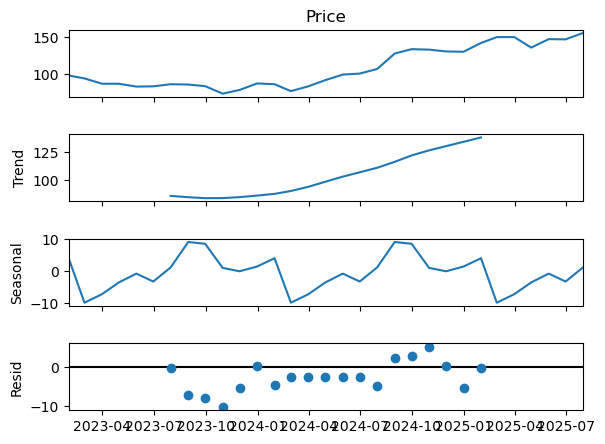

In [17]:
print("Graph For Additive Model") 
plt.figure(figsize=(12,6))
plt.suptitle('Additive Decomposition', fontsize=16)
additive_result.plot()
plt.tight_layout(pad=2) 
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


In [20]:
data3 = pd.read_csv("C:\\Users\\sharo\\OneDrive\\Desktop\\3M Stock Price History.csv", parse_dates=["Date"]) 
data3.set_index("Date", inplace=True)
monthly = data3["Price"].resample("ME").mean().dropna() 

In [21]:
hw_model = ExponentialSmoothing(monthly, trend="add", seasonal="add", seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(12)#forecaste for 12 months 


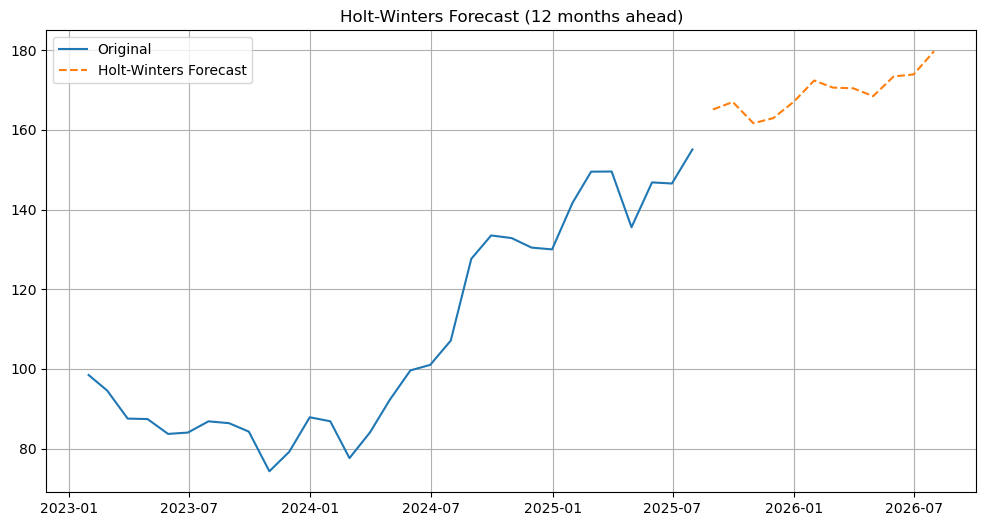

In [22]:
plt.figure(figsize=(12,6)) 
plt.plot(monthly, label="Original")
plt.plot(hw_forecast, label="Holt-Winters Forecast", linestyle="--") 
plt.title("Holt-Winters Forecast (12 months ahead)")
plt.legend() 
plt.grid() 
plt.show()


In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import statsmodels.api as sm

C:\Users\sharo\AppData\Local\Temp\ipykernel_23568\808465457.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  daily = data3.resample('D')['Price'].fillna(method="ffill")
C:\Users\sharo\AppData\Local\Temp\ipykernel_23568\808465457.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily = data3.resample('D')['Price'].fillna(method="ffill")


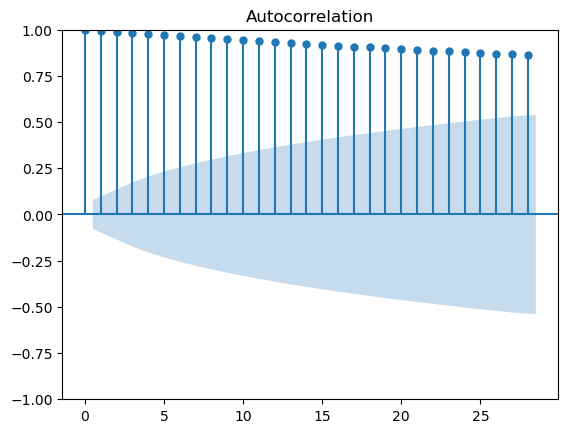

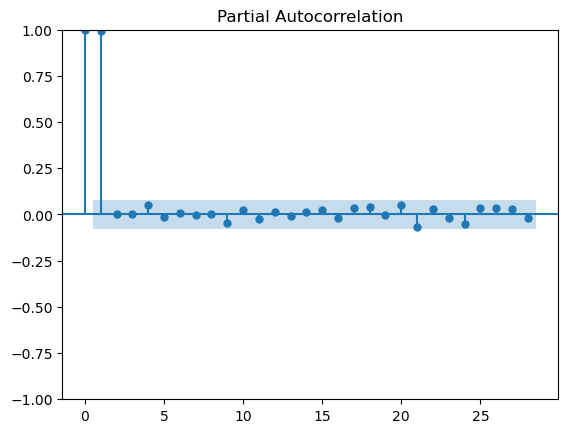

In [24]:
daily = data3.resample('D')['Price'].fillna(method="ffill")
plot_acf(daily)
plot_pacf(daily) 
plt.show() 

C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  626
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1365.704
Date:                Thu, 24 Jul 2025   AIC                           2737.408
Time:                        23:39:07   BIC                           2750.722
Sample:                             0   HQIC                          2742.581
                                - 626                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5847      0.369      1.586      0.113      -0.138       1.307
ma.L1         -0.6276      0.351     -1.786      0.074      -1.316       0.061
sigma2         4.6291      0.068     67.980      0.0

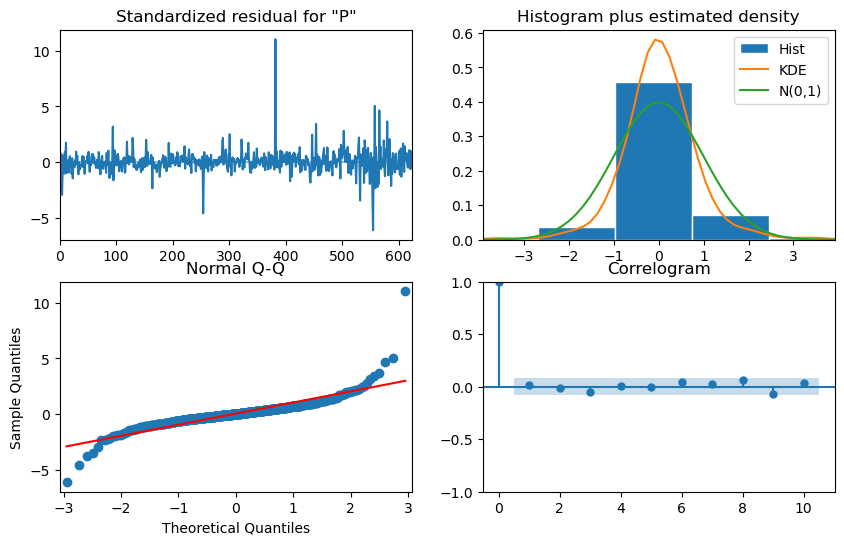

C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  626
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1360.813
Date:                            Thu, 24 Jul 2025   AIC                           2731.627
Time:                                    23:39:08   BIC                           2753.719
Sample:                                         0   HQIC                          2740.219
                                            - 626                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5979      0.382      1.565      0.118      -0.151       1.347
ma.L1         -0.6398      0.364   

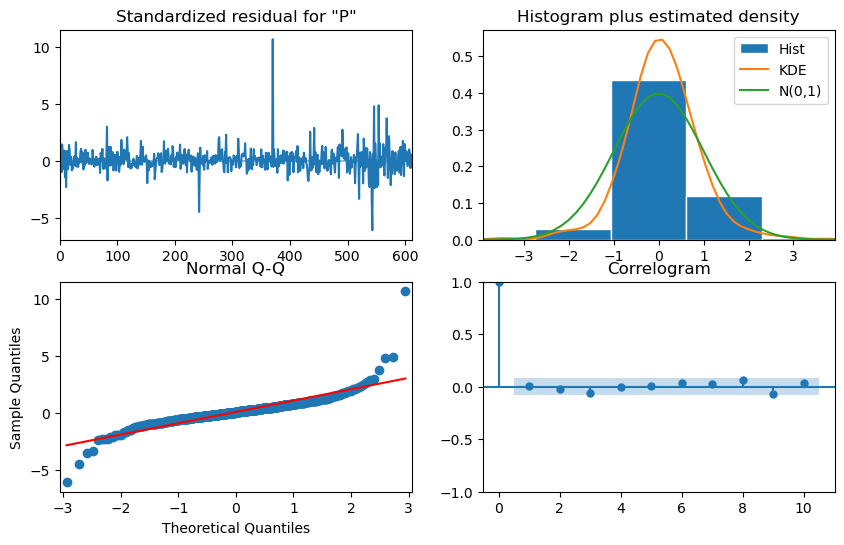

C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sharo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


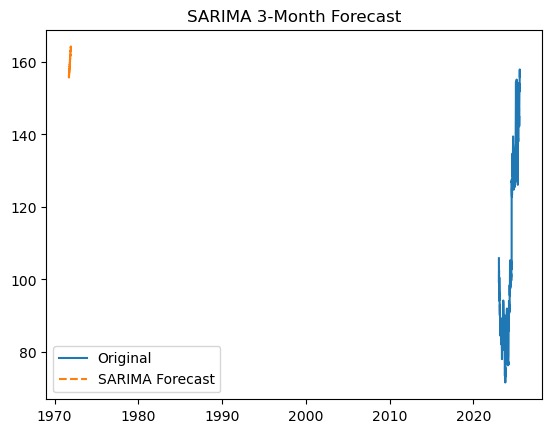

In [25]:
arima_model = ARIMA(daily, order=(1,1,1)).fit() 
print(arima_model.summary())
arima_model.plot_diagnostics(figsize=(10, 6)) 
plt.show()
sarima_model = SARIMAX(daily, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
print(sarima_model.summary())
sarima_model.plot_diagnostics(figsize=(10, 6)) 
plt.show()
forecast = sarima_model.forecast(steps=90)
plt.plot(daily, label='Original')
plt.plot(forecast, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.title("SARIMA 3-Month Forecast") 
plt.show()
